# Graficas

In [180]:
# Importar los paquetes que necesitaremos
import math
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

### Histograma

Se obtienen las ventas de estados unidos de los discos de varios artistas

In [181]:
discos = pd.read_csv('./conjunto_datos/records_us_sales.csv')
discos.sample(5)

,artist,album,year,sales
59,N.W.A,100 Miles and Runnin',1990,1000000.0
92,Deftones,Adrenaline,1995,947000.0
50,Eminem,Kamikaze,2018,493000.0
88,Korn,The Paradigm Shift,2013,NaN
94,Deftones,White Pony,2000,1238000.0


In [182]:
# cuantos discos del 2000 hay?
len(discos[(discos['year'] == 2000)])

6

In [183]:
# agrupar años por frecuencias
(discos.groupby(['year'])['year'].count().reset_index(name = 'freq')).sample(5)

,year,freq
23,2011,3
3,1991,3
31,2019,1
32,2020,5
24,2012,2


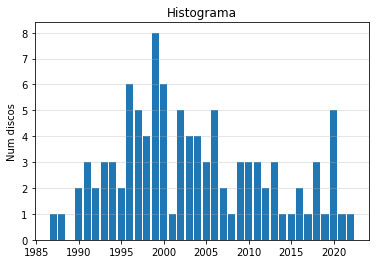

In [184]:
d = min(np.diff(np.unique(discos['year'])))
left_of_first_bin = discos['year'].min() - float(d) / 2
right_of_last_bin = discos['year'].max() + float(d) / 2
clases = np.arange(left_of_first_bin, right_of_last_bin + d, d)
plt.hist(discos['year'], clases, rwidth = 0.85)
plt.grid(axis = 'y', alpha = 0.4)
plt.title('Histograma')
plt.ylabel('Num discos')
plt.show()

### Graficas de series de tiempo

Se obtiene la cantidad de peticiones exitosas que se le han hecho a un servidor agrupadas por mes a lo largo de 2021

In [185]:
fecha_peticiones = [
	('02', 2145),
	('03', 11035),
	('04', 29990),
	('05', 17942),
	('06', 2813),
	('07', 904),
	('08', 37708),
	('09', 510038),
	('10', 253190),
	('11', 209877),
	('12', 52029)
]

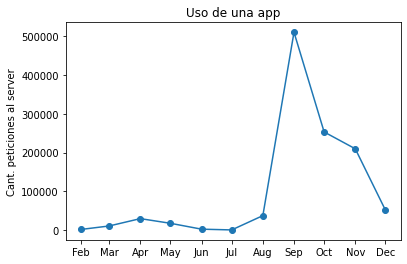

In [186]:
# hay que separar las variables para ambos ejes en listas separadas
fecha = [datetime.datetime.strptime(i[0], '%m') for i in fecha_peticiones]
peticiones = [i[1] for i in fecha_peticiones]
# grafica_serie_tiempo(fecha, peticiones, titulo = 'Uso de una app movil', etiquetay = 'Peticiones al server')

# Set the locator
locator = mdates.MonthLocator()  # cada mes
# especificar el formato - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

plt.plot(fecha, peticiones, 'o-')
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.title('Uso de una app')
plt.ylabel('Cant. peticiones al server')
plt.show()
del fecha, peticiones

### Graficas de probabilidad

Se anota el tiempo en minutos que duraron 10 baterias en una laptop:

In [187]:
duracion_baterias = [176, 191, 214, 220, 205, 192, 201, 190, 183, 185]

Probemos si esas duraciones se ajustan a una distribucion normal.

In [188]:
n = len(duracion_baterias)

d = {'j': [], 'xj': [], 'fa': [], '100fa': [], 'zj': []}
for j, xj in enumerate(sorted(duracion_baterias)):
	fa = ((j + 1) - 0.5) / n
	cien_fa = 100 * fa
	zj = st.norm.ppf(fa)
	d['j'].append(j + 1)
	d['xj'].append(xj)
	d['fa'].append(fa)
	d['100fa'].append(cien_fa)
	d['zj'].append(zj)
tabla = pd.DataFrame(d).set_index('j')
tabla

,xj,fa,100fa,zj
j,,,,
1,176,0.05,5.0,-1.644854
2,183,0.15,15.0,-1.036433
3,185,0.25,25.0,-0.674490
4,190,0.35,35.0,-0.385320
5,191,0.45,45.0,-0.125661
6,192,0.55,55.0,0.125661
7,201,0.65,65.0,0.385320
8,205,0.75,75.0,0.674490
9,214,0.85,85.0,1.036433


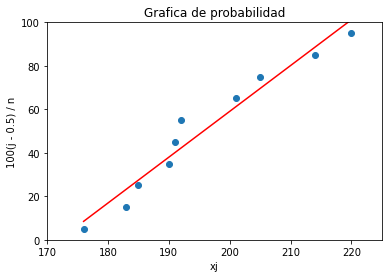

In [189]:
x = tabla['xj']
y = tabla['100fa']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r-')

plt.title('Grafica de probabilidad')
plt.xlabel('xj')
plt.ylabel('100(j - 0.5) / n')
plt.xlim(170, 225)
plt.ylim(0, 100)
plt.show()

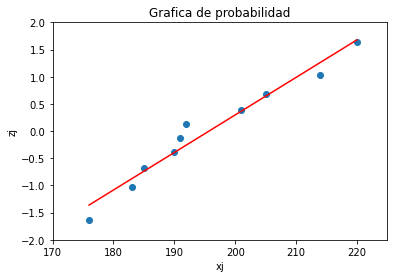

In [190]:
x = tabla['xj']
y = tabla['zj']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r-')

plt.title('Grafica de probabilidad')
plt.xlabel('xj')
plt.ylabel('zj')
plt.xlim(170, 225)
plt.ylim(-2, 2)
plt.show()